In [52]:
import time
import numpy as np
import jax
import jax.numpy as jnp
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd

Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

## Matrix Multiplication of $A_{n \times k}$ and $B_{k \times m}$


For each element C[i][j] in the resulting matrix C, k multiplications are performed. Because we multiply each element of the ith row of matrix A with the corresponding element of the jth column of matrix B, and there are k such pairs. Therefore,

Total Multiplications = n×m×k


For each element C[i][j], after performing the multiplications, you need to add up the k products.So,

Total Additions = n×m×(k-1)

Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [106]:
# using list of lists

def multiply(mat1, mat2):
    result = [[0 for _ in range(len(mat2[0]))] for _ in range(len(mat1))]

    for i in range(len(mat1)):
        for j in range(len(mat2[0])):
            for k in range(len(mat2)):
                result[i][j] += mat1[i][k] * mat2[k][j]

    return result

mat1 = [[1, 2, 3], [4, 5, 6]]
mat2 = [[7, 8], [9, 10], [11, 12]]

result_lists = multiply(mat1, mat2)
print("Matrix multiplication using lists:")
for row in result_lists:
    print(row)

# using numpy

def numpy(mat1, mat2):
    return np.dot(mat1, mat2)

mat1_np = np.array(mat1)
mat2_np = np.array(mat2)

result_numpy = numpy(mat1_np, mat2_np)
print("\nMatrix multiplication using NumPy:")
print(result_numpy)


# Timing for list of lists
start_time_lists = time.time()
multiply(mat1, mat2)
end_time_lists = time.time()
print(f"\nTime taken using list of lists: {end_time_lists - start_time_lists} seconds")

# Timing for NumPy
start_time_numpy = time.time()
numpy(mat1_np, mat2_np)
end_time_numpy = time.time()
print(f"Time taken using NumPy: {end_time_numpy - start_time_numpy} seconds")
print("\nNumPy multiplication is faster then list of lists. This is because NumPy operations are implemented in highly optimized C and Fortran code, and they leverage hardware-specific optimizations, resulting in better performance.")

Matrix multiplication using lists:
[58, 64]
[139, 154]

Matrix multiplication using NumPy:
[[ 58  64]
 [139 154]]

Time taken using list of lists: 0.00013637542724609375 seconds
Time taken using NumPy: 0.00011992454528808594 seconds

NumPy multiplication is faster then list of lists. This is because NumPy operations are implemented in highly optimized C and Fortran code, and they leverage hardware-specific optimizations, resulting in better performance.


Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Time complexity using above method is
### O(n$^2$)

A more efficient way to find the median is to use a sorting algorithm with a time complexity lower than
### O(n logn)

One more way is Quick select method
### O(n)



In [107]:
def highest_second_highest(arr):
    highest = float('-inf')
    second_highest = float('-inf')

    for num in arr:
        if num > highest:
            second_highest = highest
            highest = num
        elif num > second_highest:
            second_highest = num

    return highest, second_highest

def median_sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)

    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        middle_left = sorted_arr[n // 2 - 1]
        middle_right = sorted_arr[n // 2]
        return (middle_left + middle_right) / 2

arr = np.random.rand(10000)

def quick_median(arr):
    n = len(arr)
    if n % 2 == 1:
        return quick_select(arr, n // 2)
    else:
        left = quick_select(arr, n // 2 - 1)
        right = quick_select(arr, n // 2)
        return (left + right) / 2

def quick_select(arr, k):
    if len(arr) == 1:
        return arr[0]

    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    right = [x for x in arr if x > pivot]
    equal = [x for x in arr if x == pivot]

    if k < len(left):
        return quick_select(left, k)
    elif k < len(left) + len(equal):
        return equal[0]
    else:
        return quick_select(right, k - len(left) - len(equal))


# Timing for finding highest and second highest
start = time.time()
highest, second_highest = highest_second_highest(arr)
end = time.time()
print(f"Highest: {highest}, Second Highest: {second_highest}")
print(f"Time taken using highest and second highest: {end - start} seconds\n")

# Timing for finding median using sorting
start_sorting = time.time()
median_sorting = median_sorting(arr)
end_sorting = time.time()
print(f"Median (Sorting): {median_sorting}")
print(f"Time taken using sorting: {end_sorting - start_sorting} seconds\n")

# Timing for finding median using QuickSelect
start_quick = time.time()
median_quick = quick_median(arr)
end_quick = time.time()
print(f"Median (QuickSelect): {median_quick}")
print(f"Time taken using QuickSelect: {end_quick - start_quick} seconds\n")

# Timing for finding median using NumPy's median routine
start_time_numpy = time.time()
median_numpy = np.median(arr)
end_time_numpy = time.time()
print(f"Median (NumPy): {median_numpy}")
print(f"Time taken using NumPy: {end_time_numpy - start_time_numpy} seconds")


Highest: 0.9997176732861306, Second Highest: 0.9995577032504386
Time taken using highest and second highest: 0.0014629364013671875 seconds

Median (Sorting): 0.49280046519889015
Time taken using sorting: 0.00468897819519043 seconds

Median (QuickSelect): 0.49280046519889015
Time taken using QuickSelect: 0.013887643814086914 seconds

Median (NumPy): 0.49280046519889015
Time taken using NumPy: 0.0014781951904296875 seconds


Q4. What is the gradient of the following function with respect to x and y?

<!-- ## **Question 4.** Gradient with respect to $x$ and $y$ -->
$F(x, y) = x^2y + y^3 \sin(x)$ <br><br>


Partial derivative with respect to x and y:

$∇F = \begin{bmatrix}\frac{\partial F}{\partial x} \\ \frac{\partial F}{\partial y} \end{bmatrix} = \begin{bmatrix} 2xy + y^3 \cos(x) \\ x^2 + 3y^2 \sin(x)  \end{bmatrix}$

Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [101]:
def F(x, y):
  return x**2 * y + y**3 * jnp.sin(x)

def analytic_gradient(x, y):
  return 2 * x * y + y**3 * jnp.cos(x), x**2 + 3 * y**2 * jnp.sin(x)

gradF = jax.grad(F, argnums = (0, 1))

sample_points = np.array([(2, 1), (-1, 5), (0.5, -3)])

for X, Y in sample_points:
  print(f"Point: ({X}, {Y})")
  x, y = analytic_gradient(X, Y)
  print(f"({x}, {y})")
  print(gradF(X, Y))
  print()

Point: (2.0, 1.0)
(3.583853244781494, 6.72789192199707)
(Array(3.5838532, dtype=float32), Array(6.727892, dtype=float32))

Point: (-1.0, 5.0)
(57.53778076171875, -62.110321044921875)
(Array(57.53778, dtype=float32), Array(-62.11032, dtype=float32))

Point: (0.5, -3.0)
(-26.69472885131836, 13.194489479064941)
(Array(-26.694729, dtype=float32), Array(13.1944895, dtype=float32))



Q 6. Use sympy to confirm that you obtain the same gradient analytically.

In [94]:
x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)

gradient = [sp.diff(f, x), sp.diff(f, y)]

print("Symbolic Gradient:",gradient)

Symbolic Gradient: [2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [91]:
student_records = {
    2022: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'A',
            'Marks': {
                'Hindi': 29,
                'English': 16,
            }
        },
        'Branch 2': {
            'Roll Number': 1,
            'Name': 'B',
            'Marks': {
                'Hindi': 100,
                'English': 70,
            }
        }
    },
    2023: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'C',
            'Marks': {
                'Hindi': 46,
                'English': 75,
            }
        },
        'Branch 2': {
            'Roll Number': 1,
            'Name': 'D',
            'Marks': {
                'Hindi': 59,
                'English': 52,
            }
        },
    },
    2024: {
        'Branch 1': {'Roll Number': 1,
            'Name': 'E',
            'Marks': {
                'Hindi': 39,
                'English': 83,
            }},
        'Branch 2': {
            'Roll Number': 1,
            'Name': 'F',
            'Marks': {
                'Hindi': 90,
                'English': 35,
            }
        },
    },
    2025: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'G',
            'Marks': {
                'Hindi': 89,
                'English': 56,
            }
        },
        'Branch 2': {
            'Roll Number': 1,
            'Name': 'H',
            'Marks': {
                'Hindi': 10,
                'English': 80,
            }
        },
    }
}

print(student_records)

# specific student's information
roll = student_records[2022]['Branch 1']['Roll Number']
name = student_records[2022]['Branch 1']['Name']
marks = student_records[2022]['Branch 1']['Marks']

print(f"Roll Number: {roll}, Name: {name}, Marks: {marks}")

{2022: {'Branch 1': {'Roll Number': 1, 'Name': 'A', 'Marks': {'Hindi': 29, 'English': 16}}, 'Branch 2': {'Roll Number': 1, 'Name': 'B', 'Marks': {'Hindi': 100, 'English': 70}}}, 2023: {'Branch 1': {'Roll Number': 1, 'Name': 'C', 'Marks': {'Hindi': 46, 'English': 75}}, 'Branch 2': {'Roll Number': 1, 'Name': 'D', 'Marks': {'Hindi': 59, 'English': 52}}}, 2024: {'Branch 1': {'Roll Number': 1, 'Name': 'E', 'Marks': {'Hindi': 39, 'English': 83}}, 'Branch 2': {'Roll Number': 1, 'Name': 'F', 'Marks': {'Hindi': 90, 'English': 35}}}, 2025: {'Branch 1': {'Roll Number': 1, 'Name': 'G', 'Marks': {'Hindi': 89, 'English': 56}}, 'Branch 2': {'Roll Number': 1, 'Name': 'H', 'Marks': {'Hindi': 10, 'English': 80}}}}
Roll Number: 1, Name: A, Marks: {'Hindi': 29, 'English': 16}


Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [86]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

# Creating instances of the classes to represent the database structure
student1 = Student(1, 'A', {'Hindi': 100, 'English': 70})
student2 = Student(2, 'B', {'Hindi': 90, 'English': 80})

branch1 = Branch('Branch 1')
branch1.add_student(student1)
branch1.add_student(student2)

branch2 = Branch('Branch 2')
branch2.add_student(student1)
branch2.add_student(student2)

year2022 = Year(2022)
year2022.add_branch(branch1)
year2022.add_branch(branch2)

year2023 = Year(2023)
year2023.add_branch(branch1)
year2023.add_branch(branch2)

database = [year2022, year2023]

specific_student = database[1].branches[0].students[1]
print(f"Roll Number: {specific_student.roll_number}, Name: {specific_student.name}, Marks: {specific_student.marks}")

Roll Number: 2, Name: B, Marks: {'Hindi': 90, 'English': 80}


Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

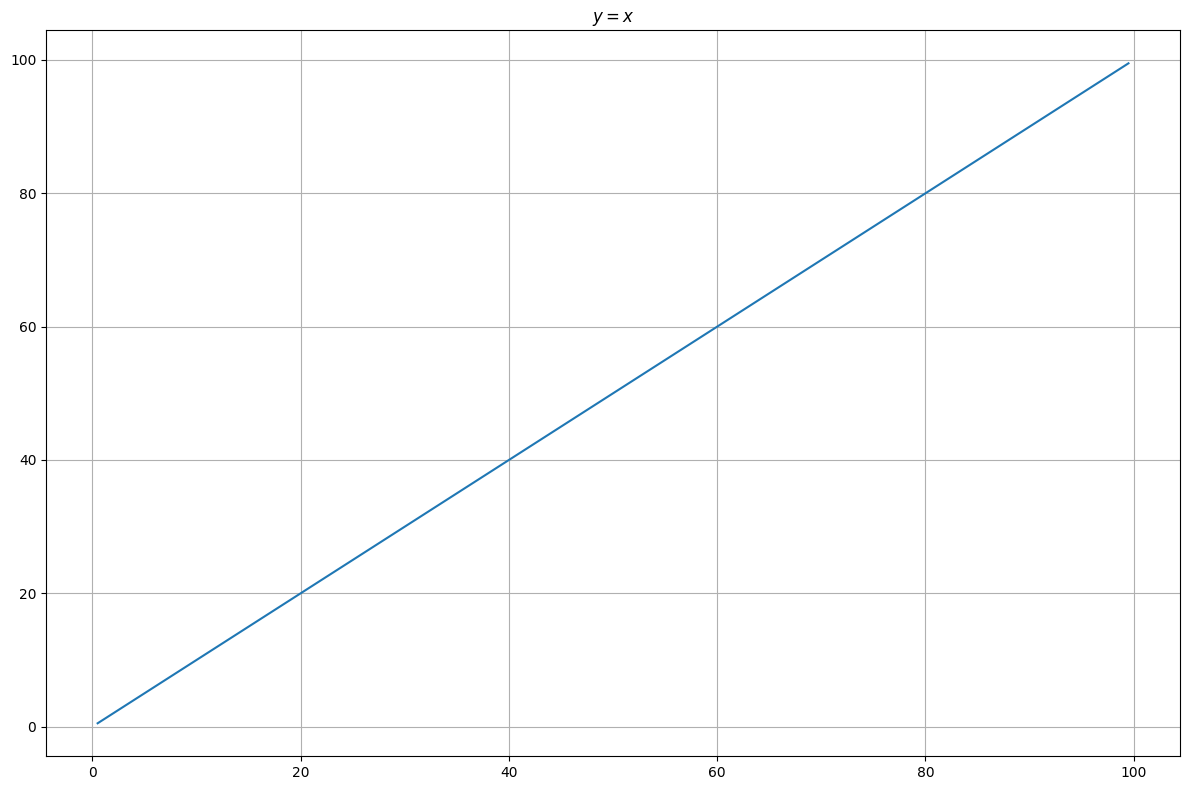

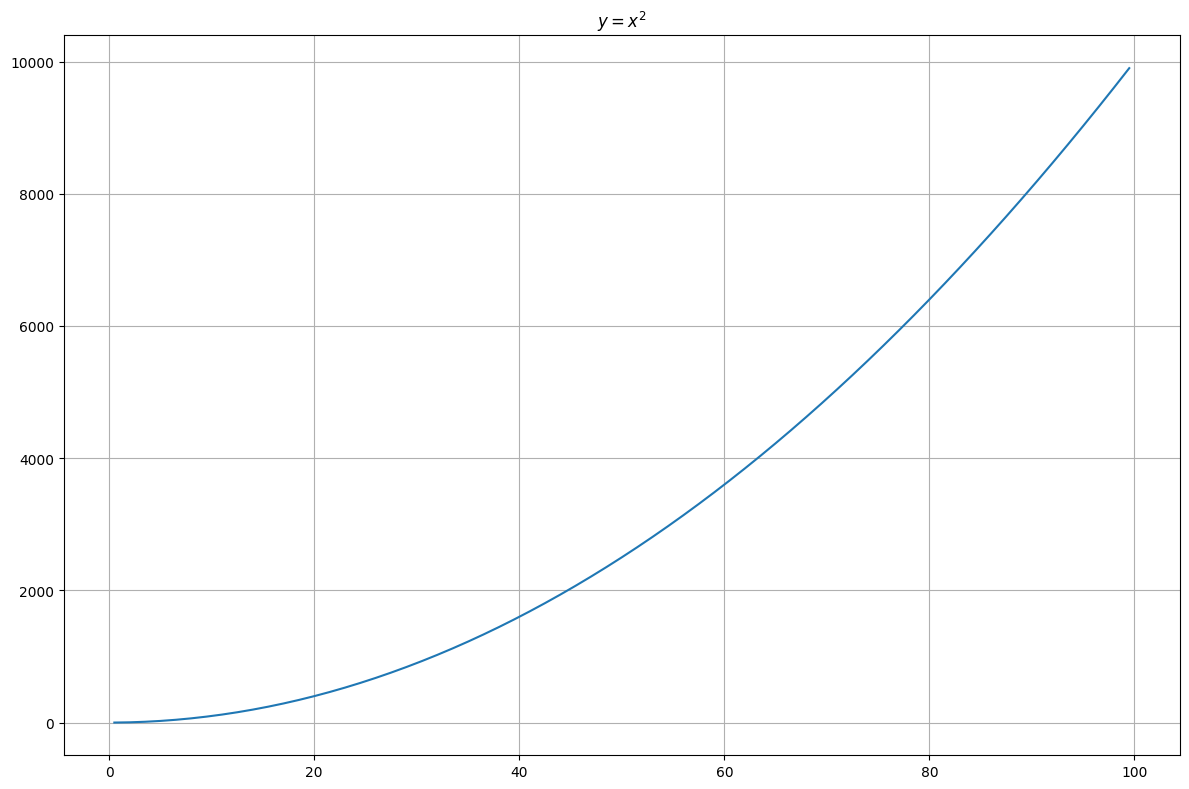

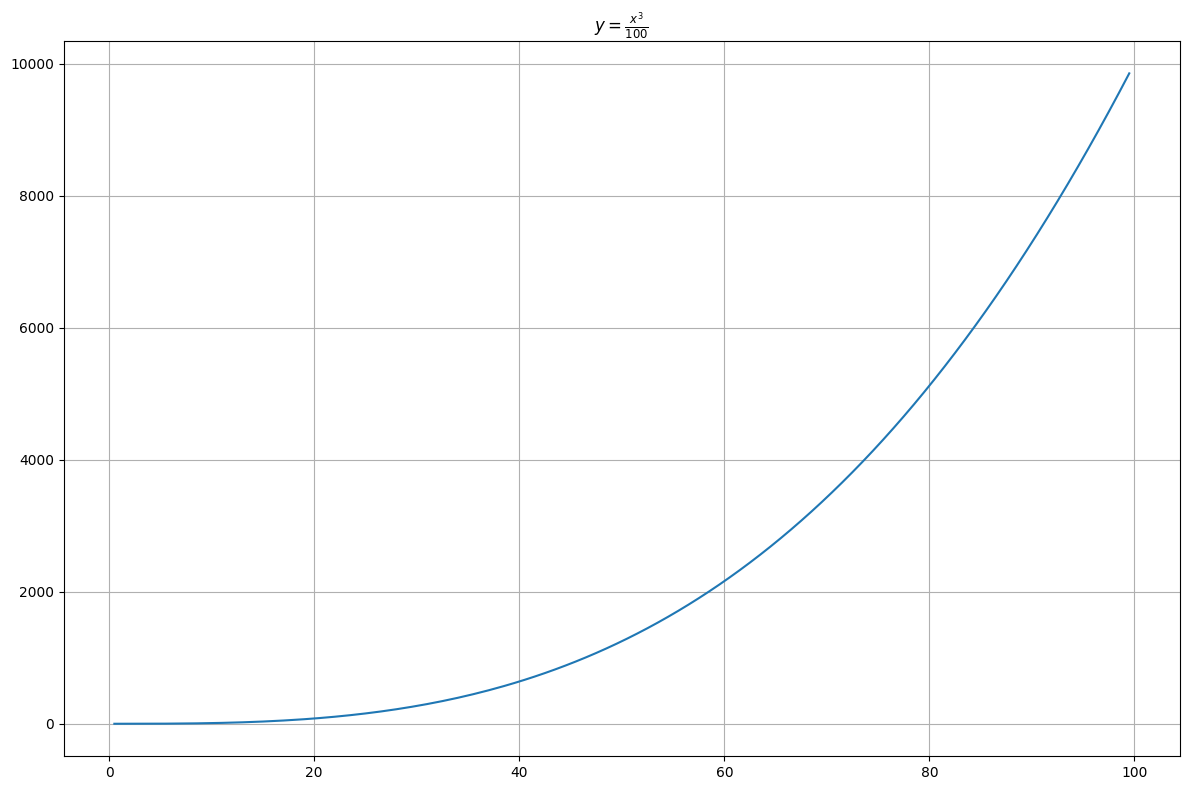

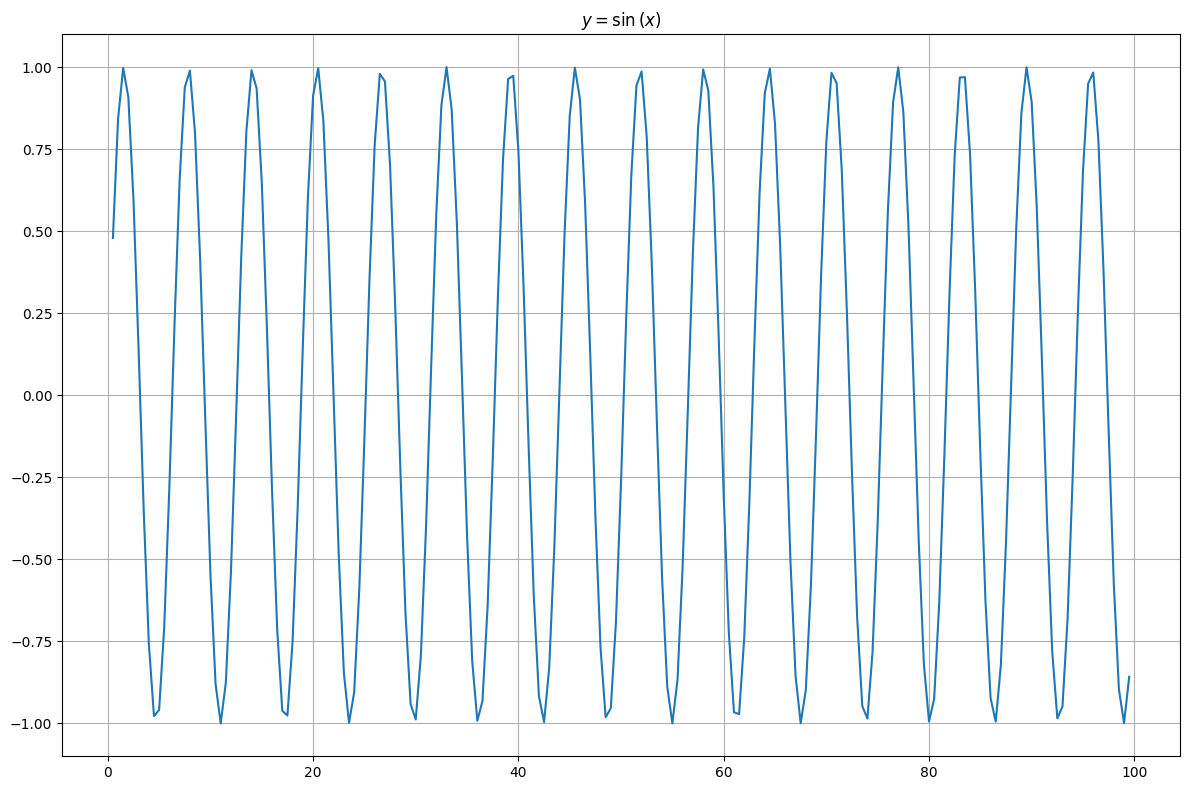

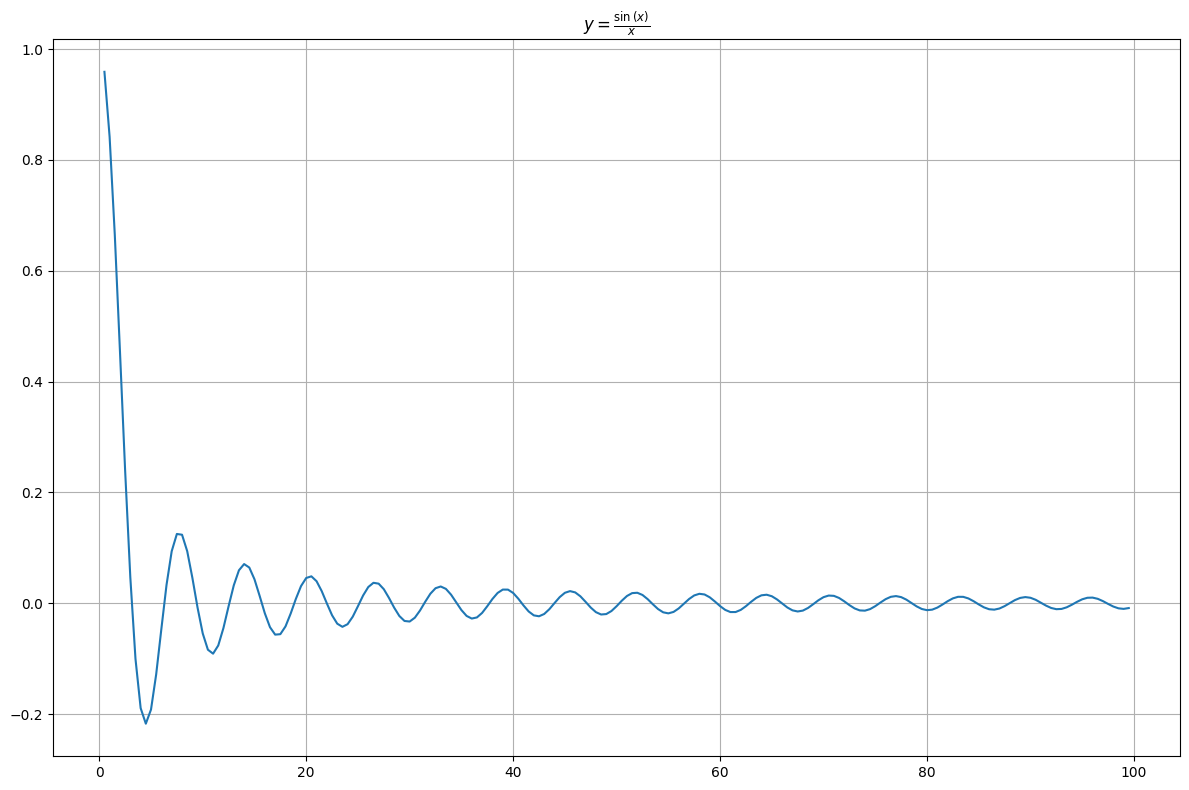

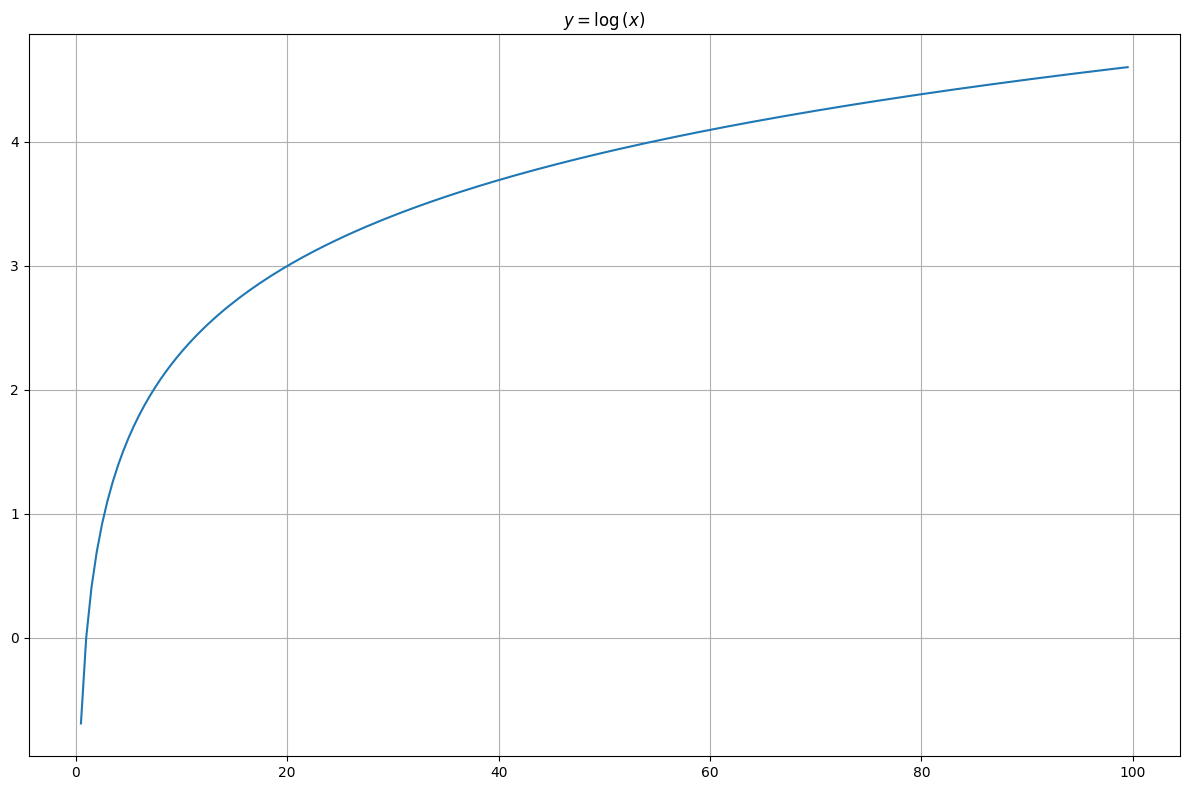

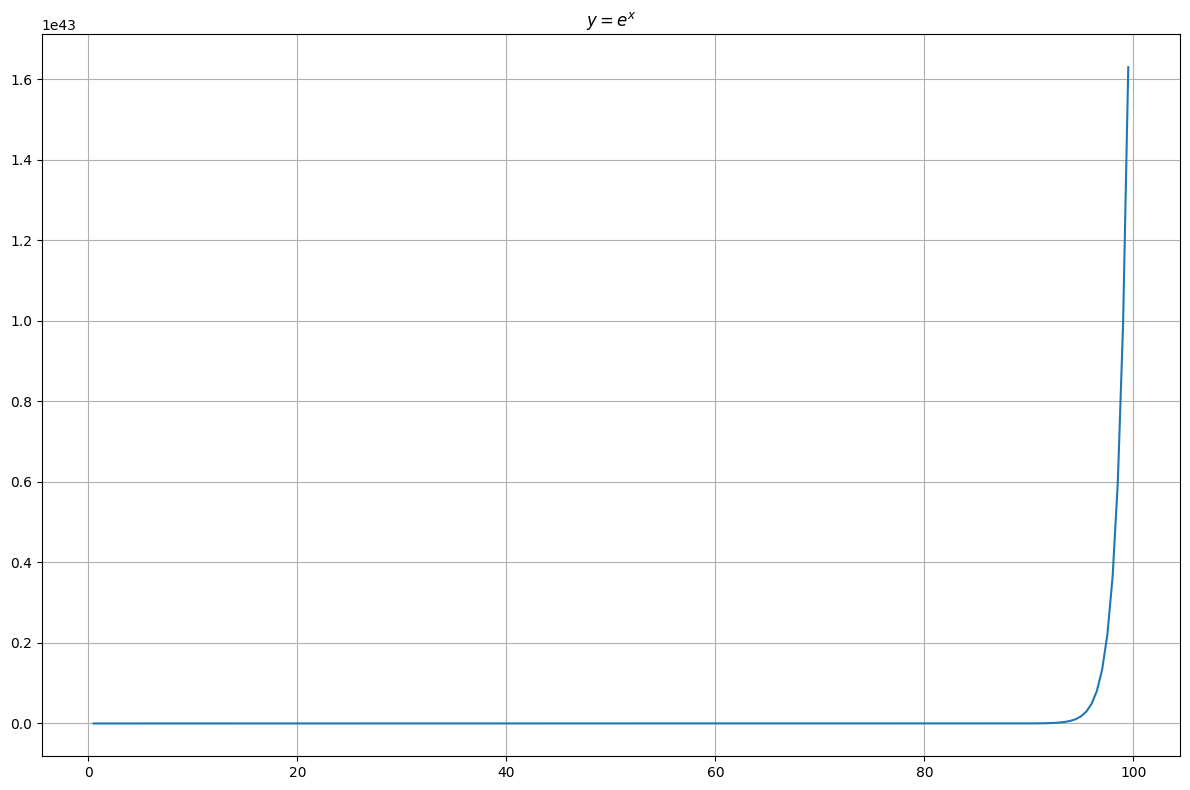

In [83]:
x = np.arange(0.5, 100.0, 0.5)

# functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

functions = np.array([y1, y2, y3, y4, y5, y6, y7])
titles = np.array([r"$y = x$", r"$y = x^2$", r"$y = \frac{x^3}{100}$", r"$y = \sin{(x)}$", r"$y = \frac{\sin{(x)}}{x}$", r"$y = \log{(x)}$", r"$y = e^x$"])
for i, y in enumerate(functions):
  plt.figure(figsize = (12, 8))
  plt.plot(x, y)
  plt.title(titles[i])
  plt.grid()
  plt.tight_layout()
  plt.show()


Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [78]:
np.random.seed(42)
matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
print("DataFrame:",df)

max_std = df.std().idxmax()
min_mean = df.mean(axis=1).idxmin()

print("\nColumn with the highest standard deviation:", max_std)
print("Row with the lowest mean:", min_mean)


DataFrame:            a         b         c         d         e
0   1.374540  1.950714  1.731994  1.598658  1.156019
1   1.155995  1.058084  1.866176  1.601115  1.708073
2   1.020584  1.969910  1.832443  1.212339  1.181825
3   1.183405  1.304242  1.524756  1.431945  1.291229
4   1.611853  1.139494  1.292145  1.366362  1.456070
5   1.785176  1.199674  1.514234  1.592415  1.046450
6   1.607545  1.170524  1.065052  1.948886  1.965632
7   1.808397  1.304614  1.097672  1.684233  1.440152
8   1.122038  1.495177  1.034389  1.909320  1.258780
9   1.662522  1.311711  1.520068  1.546710  1.184854
10  1.969585  1.775133  1.939499  1.894827  1.597900
11  1.921874  1.088493  1.195983  1.045227  1.325330
12  1.388677  1.271349  1.828738  1.356753  1.280935
13  1.542696  1.140924  1.802197  1.074551  1.986887
14  1.772245  1.198716  1.005522  1.815461  1.706857
15  1.729007  1.771270  1.074045  1.358466  1.115869
16  1.863103  1.623298  1.330898  1.063558  1.310982
17  1.325183  1.729606  1.637557  1

Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [76]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
print("DataFrame:",df)

num_rows_LT8 = len(df[df['g'] == 'LT8'])

std_dev_LT8 = df[df['g'] == 'LT8']['f'].std()
std_dev_GT8 = df[df['g'] == 'GT8']['f'].std()

print("\nNumber of rows where value in column 'g' is 'LT8':", num_rows_LT8)
print("Standard deviation of column 'f' for rows where 'g' is 'LT8':", std_dev_LT8)
print("Standard deviation of column 'f' for rows where 'g' is 'GT8':", std_dev_GT8)


DataFrame:            a         b         c         d         e         f    g
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949  LT8
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638  LT8
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069  LT8
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704  LT8
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866  LT8
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944  GT8
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907  LT8
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452  LT8
13  1.542696  1.140924  1.802197  1.0

Q12. Write a small piece of code to explain broadcasting in numpy.



In [72]:
# Broadcasting a scalar to an array
scalar_value = 2
array1 = np.array([1, 2, 3, 4, 5])

result1 = scalar_value * array1
print("Example 1:")
print("Scalar Value:", scalar_value)
print("Array 1:", array1)
print("Result:", result1)

# Broadcasting a smaller array to a larger array
array2 = np.array([[1], [2], [3], [4], [5]])

result2 = array2 * array1
print("\nExample 2:")
print("Array 1:", array1)
print("Array 2:")
print(array2)
print("Result:")
print(result2)


Example 1:
Scalar Value: 2
Array 1: [1 2 3 4 5]
Result: [ 2  4  6  8 10]

Example 2:
Array 1: [1 2 3 4 5]
Array 2:
[[1]
 [2]
 [3]
 [4]
 [5]]
Result:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [67]:
def argmin(arr):
    if len(arr) == 0:
        return False

    min_value = arr[0]
    min_index = 0

    for i, value in enumerate(arr):
        if value < min_value:
            min_value = value
            min_index = i

    return min_index

array = np.array([3, 1, 4, 17, 5, 9, 2, 6, 5, 3, 5])

np_argmin = np.argmin(array)

print("argmin result:", argmin(array))
print("np.argmin result:", np_argmin)


argmin result: 1
np.argmin result: 1
